In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2 #pip install opencv-python

IMG = './data/images_original'
img_dataset = []
genre_target = []
genres = {}
i = 0
for root, dirs, files in os.walk(IMG):
    for name in files:
        filename = os.path.join(root, name)
        img_dataset.append(filename)
        genre_target.append(filename.split("\\")[-2])
        genre = filename.split('\\')[-2]
        if(genre not in genres):
            genres[genre] = i
            i+=1

(288, 432)


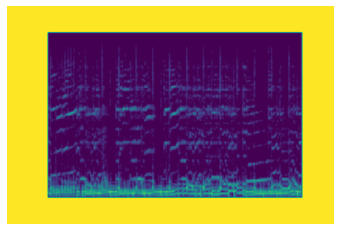

In [11]:
import matplotlib.image as mpimg

img = cv2.imread(img_dataset[42],0)
print(img.shape)
plt.imshow(img, interpolation = 'bicubic', cmap='viridis')
#plt.title("Espectrograma de Mel")
plt.axis('off')
plt.show()

In [3]:
def crop_borders(img,x1=35,x2=252,y1=54,y2=389):
    cropped = img[x1:x2,y1:y2]
    return cropped 

(217, 335, 3)


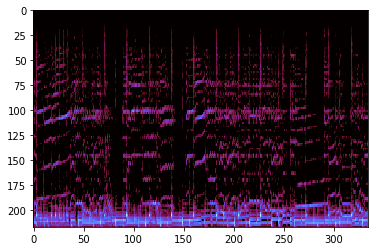

In [4]:
img = cv2.imread(img_dataset[42],1)
img_crop = crop_borders(img)
print(img_crop.shape)
plt.imshow(img_crop)

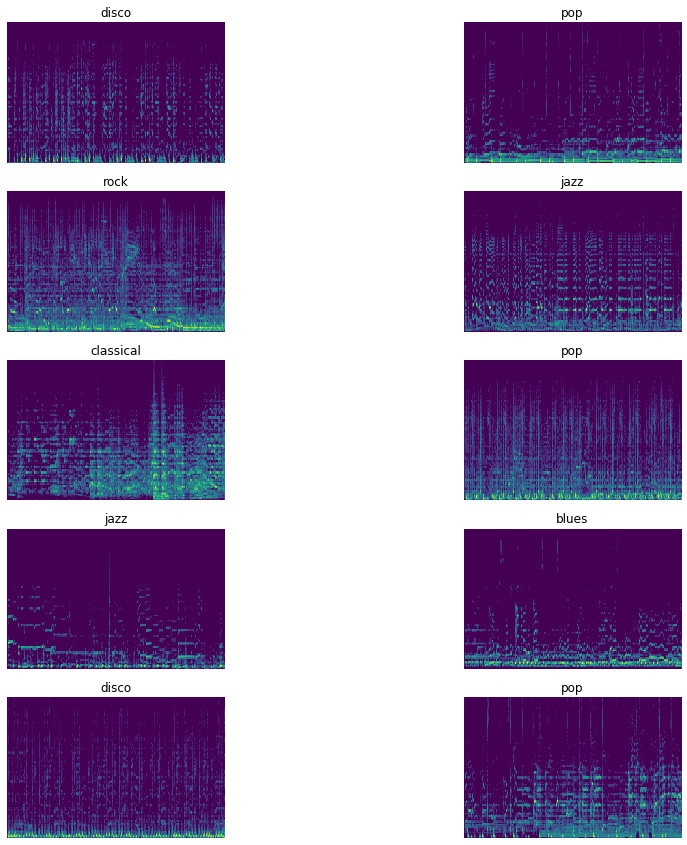

In [5]:
fig=plt.figure(figsize=(15, 15))
columns = 2
rows = 5
sample = np.random.choice(len(img_dataset), columns*rows)
for i, j in zip(range(1, columns*rows +1),sample):
    img = cv2.imread(img_dataset[j],0)
    img_crop = crop_borders(img)
    fig.add_subplot(rows, columns, i)
    plt.title(genre_target[j])
    plt.imshow(img_crop)
    plt.axis('off')
plt.show()

In [6]:
def get_y():
    y = []
    for genre in genre_target:
        n = genres[genre]
        y.append(n)
    return np.array(y)
def get_x(shape=[999,217,335], flag=0):
    x = np.empty(shape, np.uint8)
    for i in range(len(img_dataset)):
        img = cv2.imread(img_dataset[i],flag)
        img_crop = crop_borders(img)
        x[i] = img_crop
    return x

In [7]:
x = get_x([len(img_dataset),217,335,3], flag=1) #RGB
X = get_x() #Greyscale

In [8]:
print(X.shape, x.shape)

(999, 217, 335) (999, 217, 335, 3)


In [9]:
def show_sample_imgs(dataset, cmap='gray', c=5, r=2):
    np.random.seed(5)
    fig=plt.figure(figsize=(15, 15))
    columns = c
    rows = r
    sample = np.random.choice(len(img_dataset), columns*rows, 42)
    for i, j in zip(range(1, columns*rows +1),sample):
        fig.add_subplot(rows, columns, i)
        plt.title(genre_target[j])
        plt.imshow(dataset[j], cmap)
        plt.axis('off')
    plt.show()

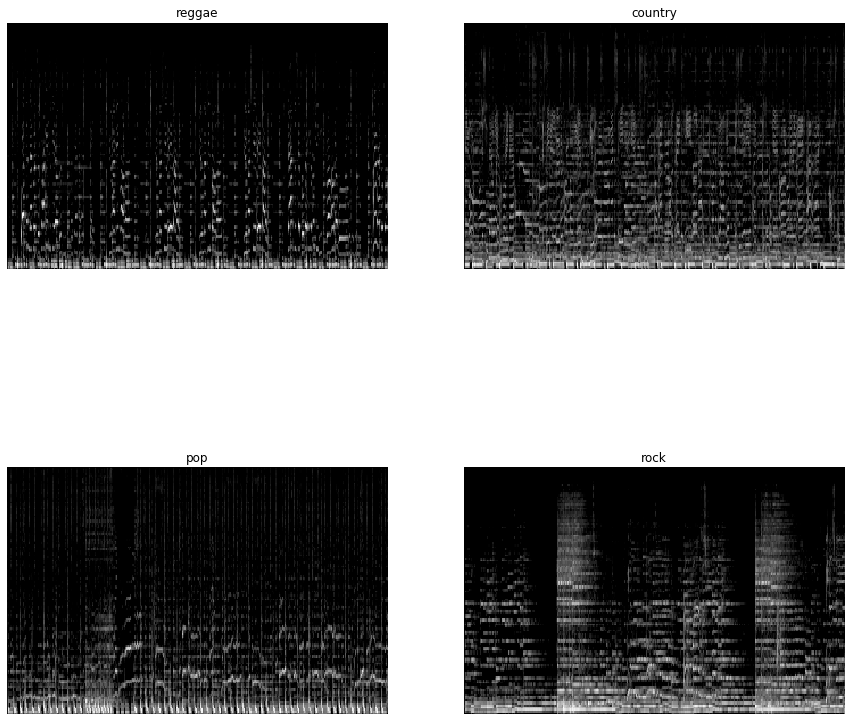

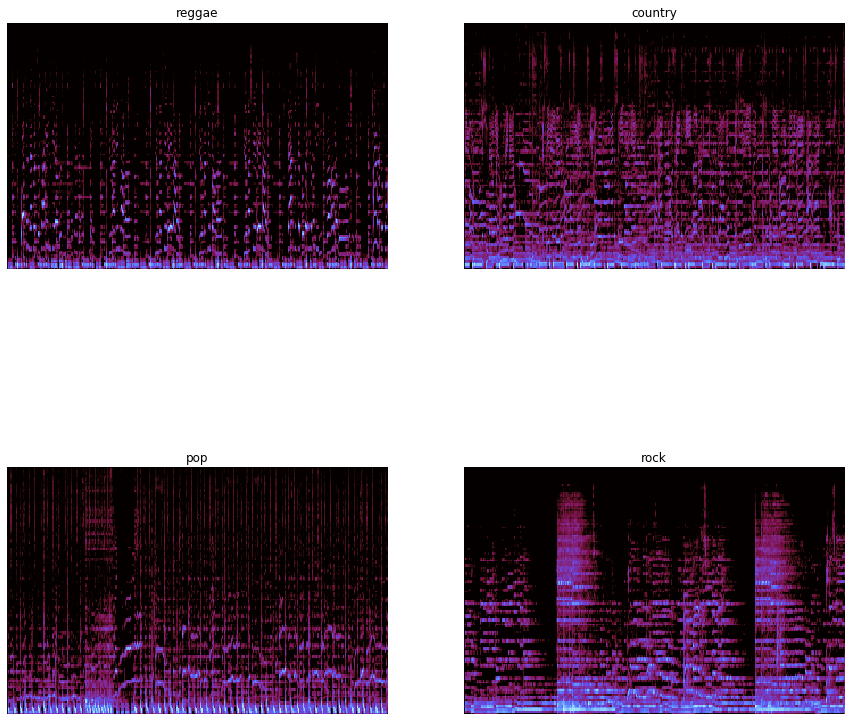

In [10]:
show_sample_imgs(X, c=2, r=2)
show_sample_imgs(x, c=2, r=2)